In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.utils import shuffle

In [13]:
filePath = 'GOOGL.csv' #getting data path

#Date,Open,High,Low,Close,Adj Close,Volume

data = pd.read_csv(filePath, names=["Date", 
        "Open", "High", "Low", 
	    "Close", "Adj Close",
	    "Volume"]) #read data from pandas

data = data.truncate(before=4177) #getting data from 2021 to 2022

data = data.select_dtypes(include='number').apply(zscore) 

print(data.head(), data[-5:-1], data.shape)

          Open      High       Low     Close  Adj Close    Volume
4177 -2.445681 -2.462297 -2.476107 -2.549683  -2.549683 -0.442809
4178 -2.538956 -2.551888 -2.613986 -2.549974  -2.549974  0.328655
4179 -2.527702 -2.577387 -2.581475 -2.582072  -2.582072 -0.238035
4180 -2.567255 -2.537324 -2.574772 -2.494623  -2.494623 -0.348287
4181 -2.440671 -2.482411 -2.446152 -2.491800  -2.491800 -0.287448           Open      High       Low     Close  Adj Close    Volume
4426  0.087355  0.219244  0.105380  0.315364   0.315364  0.984971
4427  0.312348  0.285010  0.259054  0.313371   0.313371 -0.323061
4428  0.307255  0.611390  0.427391  0.626168   0.626168  0.319752
4429  0.520912  0.492139  0.572643  0.493915   0.493915 -0.447557 (254, 6)


In [15]:
features = data.drop(['Close'], axis=1) #getting the training features
labels = data['Close'] #getting the training labels
print(labels.head(), labels[-5:-1],features.head())

4177   -2.549683
4178   -2.549974
4179   -2.582072
4180   -2.494623
4181   -2.491800
Name: Close, dtype: float64 4426    0.315364
4427    0.313371
4428    0.626168
4429    0.493915
Name: Close, dtype: float64           Open      High       Low  Adj Close    Volume
4177 -2.445681 -2.462297 -2.476107  -2.549683 -0.442809
4178 -2.538956 -2.551888 -2.613986  -2.549974  0.328655
4179 -2.527702 -2.577387 -2.581475  -2.582072 -0.238035
4180 -2.567255 -2.537324 -2.574772  -2.494623 -0.348287
4181 -2.440671 -2.482411 -2.446152  -2.491800 -0.287448


In [16]:
fd = int(.7*len(data)) #Getting first split index point of division 
sd = fd+int(.15*len(data)) #Getting second split index point of division

trainF, validationF, testF = np.split(features, [fd, sd]) #split data in train, test and validation sets
trainLE, validationLE, testLE = np.split(labels, [fd, sd]) #split data in train, test and validation sets
print(trainF.shape, validationF.shape, testF.shape)
print(trainLE.shape, validationLE.shape, testLE.shape)
#print(validationLE[:5])

(177, 5) (38, 5) (39, 5)
(177,) (38,) (39,)


In [17]:
model = Sequential() #instantiate the Sequential module to create the model
#model.add(Dense(13, input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
#model.add(Dense(13, kernel_initializer='zeros', input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
#model.add(Dense(2, kernel_initializer='ones', input_dim=5, activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
#model.add(Dense(1, activation='linear')) #adding the output layer
model.add(Dense(1, input_dim=5, activation='linear')) #adding the output layer
model.compile(Adam(lr=0.2), loss='mean_absolute_error', metrics=['mae','mse']) #definning the learning rate
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\guazo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
valSet = (validationF, validationLE)
history = model.fit(trainF, trainLE, epochs=100, validation_data=valSet) #training the model

Epoch 1/100
6/6 [==============================] - 2s 139ms/step - loss: 0.3736 - mae: 0.3736 - mse: 0.2294 - val_loss: 0.3301 - val_mae: 0.3301 - val_mse: 0.1708
Epoch 2/100
6/6 [==============================] - 0s 57ms/step - loss: 0.2563 - mae: 0.2563 - mse: 0.1116 - val_loss: 0.1445 - val_mae: 0.1445 - val_mse: 0.0271
Epoch 3/100
6/6 [==============================] - 0s 45ms/step - loss: 0.1651 - mae: 0.1651 - mse: 0.0426 - val_loss: 0.1676 - val_mae: 0.1676 - val_mse: 0.0388
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1908 - mae: 0.1908 - mse: 0.0604 - val_loss: 0.1520 - val_mae: 0.1520 - val_mse: 0.0277
Epoch 5/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1381 - mae: 0.1381 - mse: 0.0259 - val_loss: 0.1401 - val_mae: 0.1401 - val_mse: 0.0243
Epoch 6/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0976 - mae: 0.0976 - mse: 0.0149 - val_loss: 0.1216 - val_mae: 0.1216 - val_mse: 0.0190
Epoch 7/100
6/6 [==========

In [19]:
labelPred = model.predict(testF)
print(labelPred[:10])

[[0.15121283]
 [0.25720978]
 [0.28962168]
 [0.7824106 ]
 [0.6590874 ]
 [0.7611264 ]
 [0.44941747]
 [0.48737237]
 [0.7163454 ]
 [0.49090984]]


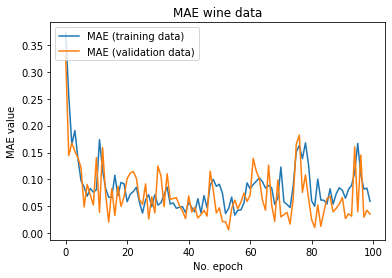

In [20]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE wine data')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()